In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (9,6)
np.set_printoptions(suppress=True)
pd.options.display.max_columns = 150

FILES:

    - application_test.csv.zip
    - application_train.csv.zip

    - HomeCredit_columns_description.csv
    - installments_payments.csv.zip
    - POS_CASH_balance.csv.zip
    - previous_application.csv.zip
    - bureau_balance.csv.zip
    - bureau.csv.zip
    - credit_card_balance.csv.zip

In [5]:
def anom_eval(df, col, filename):
    print(col_descrip(filename, col))
    print()

    max_diff_idx = df[col].sort_values().diff().nlargest(3).index
    max_diffs = df.loc[max_diff_idx, col]
    nlargest = df[col].nlargest()
    nsmallest = df[col].nsmallest()

    print('Max Diffs')
    print(max_diffs)
    print()
    print("Largest Vals")
    print(nlargest)
    print()
    print("Smallest Vals")
    print(nsmallest)
    df[col].hist()
    df[col].value_counts().sort_index()
    
    return max_diffs, nlargest

## Column Descriptions

In [6]:
col_des = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin-1')
col_des.shape

(219, 5)

In [7]:
col_des.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [8]:
col_des.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

## Cleaning


  - Examine Distribution of Target (check for imbalanced classes)
  - Examine Column Types
  - Remove/Impute Anomalies
    - You can also create a categorical value (0,1) for whether or not the data was anomalous.
  - Fill Missing Variables
  - Label Encode binary features and OHE multiple categorical ftrs
    - _Make sure to drop categories that are not in the test set!_
    - check out df.align?
  - Look for correlations
  - Feature Engineering

## Applications

Main File

Contains main id. 1 Row is 1 loan.

In [9]:
app_train = pd.read_csv('application_train.csv.zip', dtype= {'SK_ID_CURR':str})
app_test = pd.read_csv('application_test.csv.zip', dtype= {'SK_ID_CURR':str})
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [10]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
list(
    zip(col_des[col_des.Table=='application_{train|test}.csv'].Row.tolist(),col_des[col_des.Table=='application_{train|test}.csv'].Description.tolist())
)

[('SK_ID_CURR', 'ID of loan in our sample'),
 ('TARGET',
  'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'),
 ('NAME_CONTRACT_TYPE', 'Identification if loan is cash or revolving'),
 ('CODE_GENDER', 'Gender of the client'),
 ('FLAG_OWN_CAR', 'Flag if the client owns a car'),
 ('FLAG_OWN_REALTY', 'Flag if client owns a house or flat'),
 ('CNT_CHILDREN', 'Number of children the client has'),
 ('AMT_INCOME_TOTAL', 'Income of the client'),
 ('AMT_CREDIT', 'Credit amount of the loan'),
 ('AMT_ANNUITY', 'Loan annuity'),
 ('AMT_GOODS_PRICE',
  'For consumer loans it is the price of the goods for which the loan is given'),
 ('NAME_TYPE_SUITE',
  'Who was accompanying client when he was applying for the loan'),
 ('NAME_INCOME_TYPE',
  'Clients income type (businessman, working, maternity leave,\x85)'),
 ('NAME_EDUCATION_TYPE', 'Level of highest education t

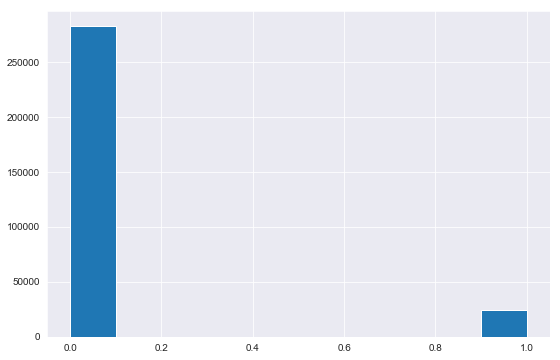

In [12]:
# Well fuck
app_train.TARGET.hist()

In [13]:
app_train.groupby('CODE_GENDER').TARGET.sum()

CODE_GENDER
F      14170
M      10655
XNA        0
Name: TARGET, dtype: int64

Text(0.5,0,'Age Yrs')

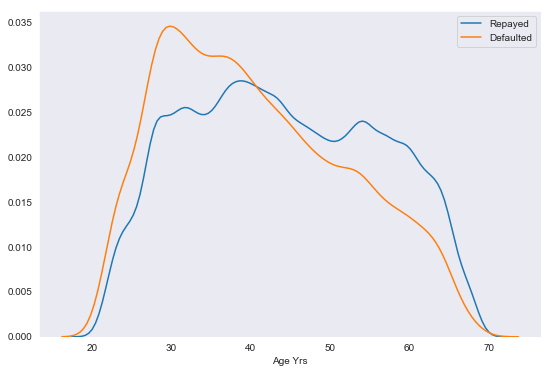

In [14]:
sns.kdeplot(app_train.loc[app_train.TARGET==0, 'DAYS_BIRTH']/-365, label = 'Repayed')
sns.kdeplot(app_train.loc[app_train.TARGET==1, 'DAYS_BIRTH']/-365, label = 'Defaulted')
plt.xlabel('Age Yrs')

### BUREAU

In [15]:
bureau = pd.read_csv("bureau.csv.zip", dtype= {'SK_ID_CURR':str, 'SK_ID_BUREAU':str})
bureau.shape

(1716428, 17)

In [16]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [17]:
list(
    zip(col_des[col_des.Table=='bureau.csv'].Row.tolist(),col_des[col_des.Table=='bureau.csv'].Description.tolist())
)

[('SK_ID_CURR',
  'ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau '),
 ('SK_BUREAU_ID',
  'Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)'),
 ('CREDIT_ACTIVE', 'Status of the Credit Bureau (CB) reported credits'),
 ('CREDIT_CURRENCY', 'Recoded currency of the Credit Bureau credit'),
 ('DAYS_CREDIT',
  'How many days before current application did client apply for Credit Bureau credit'),
 ('CREDIT_DAY_OVERDUE',
  'Number of days past due on CB credit at the time of application for related loan in our sample'),
 ('DAYS_CREDIT_ENDDATE',
  'Remaining duration of CB credit (in days) at the time of application in Home Credit'),
 ('DAYS_ENDDATE_FACT',
  'Days since CB credit ended at the time of application in Home Credit (only for closed credit)'),
 ('AMT_CREDIT_MAX_OVERDUE',
  'Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in

In [18]:
bureau.SK_ID_CURR.nunique(), app_train.SK_ID_CURR.nunique()

(305811, 307511)

## Bureau Balance

In [19]:
bureau_balances = pd.read_csv('bureau_balance.csv.zip',  dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str})
bureau_balances.shape

(27299925, 3)

In [20]:
bureau_balances.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [21]:
list(
    zip(col_des[col_des.Table=='bureau_balance.csv'].Row.tolist(),col_des[col_des.Table=='bureau_balance.csv'].Description.tolist())
)

[('SK_BUREAU_ID',
  'Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table '),
 ('MONTHS_BALANCE',
  'Month of balance relative to application date (-1 means the freshest balance date)'),
 ('STATUS',
  'Status of Credit Bureau loan during the month (active, closed, DPD0-30,\x85 [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,\x85 5 means DPD 120+ or sold or written off ] )')]

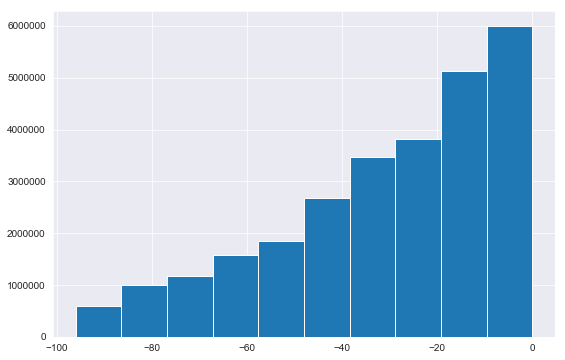

In [22]:
# Most lones were short term?
bureau_balances.MONTHS_BALANCE.hist()

## Credit Card Balances

In [23]:
cc_balances = pd.read_csv('credit_card_balance.csv.zip', 
                          dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str, "SK_ID_PREV":str})
cc_balances.shape

(3840312, 23)

In [24]:
cc_balances.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [25]:
list(
    zip(col_des[col_des.Table=='credit_card_balance.csv'].Row.tolist(),col_des[col_des.Table=='credit_card_balance.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('MONTHS_BALANCE',
  'Month of balance relative to application date (-1 means the freshest balance date)'),
 ('AMT_BALANCE', 'Balance during the month of previous credit'),
 ('AMT_CREDIT_LIMIT_ACTUAL',
  'Credit card limit during the month of the previous credit'),
 ('AMT_DRAWINGS_ATM_CURRENT',
  'Amount drawing at ATM during the month of the previous credit'),
 ('AMT_DRAWINGS_CURRENT',
  'Amount drawing during the month of the previous credit'),
 ('AMT_DRAWINGS_OTHER_CURRENT',
  'Amount of other drawings during the month of the previous credit'),
 ('AMT_DRAWINGS_POS_CURRENT',
  'Amount drawing or buying goods during the month of the previous credit'),
 ('AMT_INST_MIN_REGULARITY',
  'Minimal installment for this month of the previous credit'),
 ('AMT_PAYMENT_CURRENT',
  'How

## Previous Applications

In [26]:
prev_apps = pd.read_csv('previous_application.csv.zip',
                        dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str, "SK_ID_PREV":str}
                       )
prev_apps.shape

(1670214, 37)

In [27]:
prev_apps.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
list(
    zip(col_des[col_des.Table=='previous_application.csv'].Row.tolist(),col_des[col_des.Table=='previous_application.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) '),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('NAME_CONTRACT_TYPE',
  'Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application'),
 ('AMT_ANNUITY', 'Annuity of previous application'),
 ('AMT_APPLICATION',
  'For how much credit did client ask on the previous application'),
 ('AMT_CREDIT',
  'Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT'),
 ('AMT_DOWN_PAYMENT', 'Down payment on the previous application'),
 ('AMT_GOODS_PRICE',
  'Goods price of good that client asked for (if applicable) on the pr

In [29]:
# Current loans appear multiple times (aka as man as 77 previous apps)
prev_apps.SK_ID_CURR.value_counts().unique()

array([77, 73, 72, 68, 67, 66, 64, 63, 62, 61, 60, 59, 58, 55, 54, 53, 52,
       51, 50, 49, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [30]:
prev_apps.SK_ID_PREV.duplicated().sum() 

0

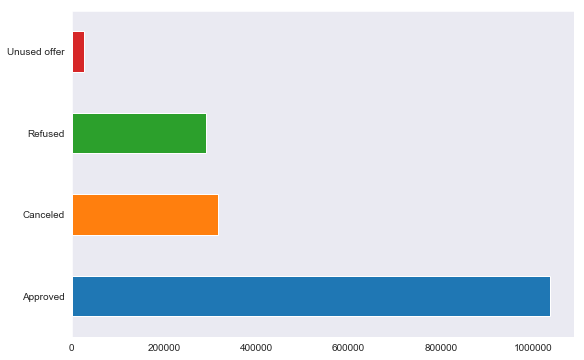

In [31]:
prev_apps.NAME_CONTRACT_STATUS.value_counts().plot.barh()

In [32]:
# what pct of prior refused defaulted?

# ftrs might be n_prev_apps, and pct_each_status

## POS Cash Balances

In [33]:
pos_cb = pd.read_csv('POS_CASH_balance.csv.zip',
                     dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str, "SK_ID_PREV":str}
                    )
pos_cb.shape

(10001358, 8)

In [34]:
list(
    zip(col_des[col_des.Table=='POS_CASH_balance.csv'].Row.tolist(),col_des[col_des.Table=='POS_CASH_balance.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('MONTHS_BALANCE',
  'Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )'),
 ('CNT_INSTALMENT', 'Term of previous credit (can change over time)'),
 ('CNT_INSTALMENT_FUTURE', 'Installments left to pay on the previous credit'),
 ('NAME_CONTRACT_STATUS', 'Contract status during the month'),
 ('SK_DPD', 'DPD (days past due) during the month of previous credit'),
 ('SK_DPD_DEF',
  'DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit')]

4231

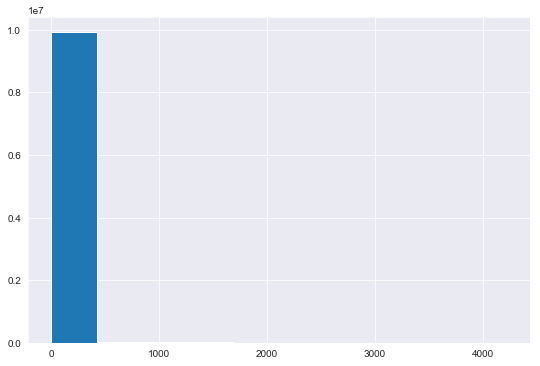

In [35]:
pos_cb.SK_DPD.hist()
pos_cb.SK_DPD.max()

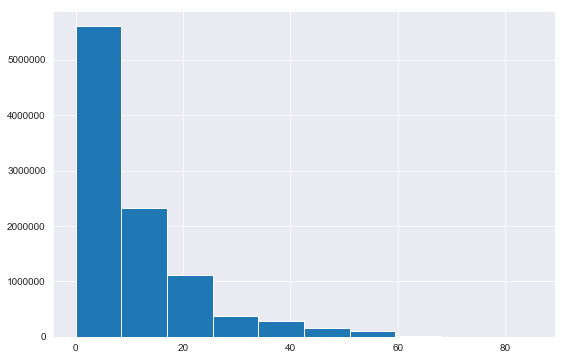

In [36]:

pos_cb.CNT_INSTALMENT_FUTURE.hist()

## Installments Payments

In [37]:
payments = pd.read_csv('installments_payments.csv.zip',
                       dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str, "SK_ID_PREV":str}
                      )
payments.shape

(13605401, 8)

In [38]:
payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [39]:
list(
    zip(col_des[col_des.Table=='installments_payments.csv'].Row.tolist(),col_des[col_des.Table=='installments_payments.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('NUM_INSTALMENT_VERSION',
  'Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed'),
 ('NUM_INSTALMENT_NUMBER', 'On which installment we observe payment'),
 ('DAYS_INSTALMENT',
  'When the installment of previous credit was supposed to be paid (relative to application date of current loan)'),
 ('DAYS_ENTRY_PAYMENT',
  'When was the installments of previous credit paid actually (relative to application date of current loan)'),
 ('AMT_INSTALMENT',
  'What was the prescribed installment amount of previous credit on this installment'),
 ('AMT_PAYMENT',
  'What the client actually paid on previous credit on this installment')]

In [40]:
#most people payed more than the installment. Some payed less, but looks like outliers?
(payments.AMT_INSTALMENT - payments.AMT_PAYMENT).describe()

count    1.360250e+07
mean    -1.871538e+02
std      1.910673e+04
min     -2.630909e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.424726e+06
dtype: float64

## Clean and Combine

    - Applications
    - Bureau & Bureau Balance
    - Credit Card Balances
    - Payments
    - pos_cb
    - prev_apps
    
   

In [43]:
from dstk.utils.data_cleaning import clean_columns

### Applications

In [42]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Clean Columns

In [41]:
# clean columns
app_train.columns = clean_columns(app_train)
app_test.columns = clean_columns(app_test)
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

#### Check Column Types

In [42]:
app_train.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [43]:
pk = ['sk_id_curr']
tgt = ['target']
obj_cols = app_train.dtypes[app_train.dtypes=='object'].index.drop(pk).tolist()
int_cols = app_train.dtypes[app_train.dtypes=='int64'].index.tolist()
float_cols = app_train.dtypes[app_train.dtypes=='float64'].index.tolist()
indicator_cols = []


numeric_cols = int_cols + float_cols

Some columns are already encoded

will come back to this?

In [44]:
indicator_cols.extend(app_train[numeric_cols].nunique()[app_train[numeric_cols].nunique() == 2].index.tolist())
int_cols = [i for i in int_cols if i not in indicator_cols]
float_cols = [i for i in float_cols if i not in indicator_cols]


numeric_cols = int_cols + float_cols

In [45]:
# Target column separate
for c in tgt:
    indicator_cols.remove(c)

In [46]:
# not sure what to do about these :-/
# NOTE nunique() does NOT count nans!
app_train[numeric_cols].nunique()[app_train[numeric_cols].nunique() < 10]

region_rating_client           3
region_rating_client_w_city    3
def_60_cnt_social_circle       9
amt_req_credit_bureau_hour     5
amt_req_credit_bureau_day      9
amt_req_credit_bureau_week     9
dtype: int64

In [47]:
def col_descrip(table, col):
    "Looks up column description for given table"
    print(table)
    print(col)
    return col_des.loc[(col_des.Table==table) & (col_des.Row==col.upper()), 
            'Description'].values[0]

In [48]:
col_descrip('application_{train|test}.csv', 'region_rating_client')

application_{train|test}.csv
region_rating_client


'Our rating of the region where client lives (1,2,3)'

In [49]:
col_descrip('application_{train|test}.csv', 'amt_req_credit_bureau_day')

application_{train|test}.csv
amt_req_credit_bureau_day


'Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)'

In [50]:
col_descrip('application_{train|test}.csv', 'amt_req_credit_bureau_hour')

application_{train|test}.csv
amt_req_credit_bureau_hour


'Number of enquiries to Credit Bureau about the client one hour before application'

In [51]:
app_train['amt_req_credit_bureau_day'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [52]:
len(pk) + len(tgt) + len(obj_cols) + len(indicator_cols) + len(int_cols) + len(float_cols), app_train.columns.shape

(122, (122,))

In [53]:
# Order the columns
app_train = app_train[pk + tgt + sorted(obj_cols) + sorted(indicator_cols) + sorted(int_cols) + sorted(float_cols)]
app_test = app_test[pk + sorted(obj_cols) + sorted(indicator_cols) + sorted(int_cols) + sorted(float_cols)]
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

Days cols with negative numbers

In [54]:
# all columns that have ANY negative numbers
neg_cols = app_train[numeric_cols].loc[:,(app_train[numeric_cols] < 0).any(0)].columns

In [55]:
# make positive for interpretation sake
app_train[neg_cols] = app_train[neg_cols] * -1
app_test[neg_cols] = app_test[neg_cols] * -1

In [56]:
# Days employed has some negative some positive values
app_train[numeric_cols].loc[:,(app_train[numeric_cols] < 0).any(0)].columns

Index(['days_employed'], dtype='object')

In [57]:
# multiply just neg values by -1
app_train.loc[app_train['days_employed']<0, 'days_employed'] = app_train.loc[app_train['days_employed']<0, 'days_employed'] * -1

#### Anomalies

In [46]:
def anom_eval(df, col, filename):
    print(col_descrip(filename, col))
    print()

    max_diff_idx = df[col].sort_values().diff().nlargest(3).index
    max_diffs = df.loc[max_diff_idx, col]
    nlargest = df[col].nlargest()
    nsmallest = df[col].nsmallest()

    print('Max Diffs')
    print(max_diffs)
    print()
    print("Largest Vals")
    print(nlargest)
    print()
    print("Smallest Vals")
    print(nsmallest)
    df[col].hist()
    df[col].value_counts().sort_index()
    
    return max_diffs, nlargest

In [59]:
# col = 'amt_income_total'
# app_train[col].hist()

# sns.boxplot(app_train[col], whis=10)

# p25 = np.percentile(app_train[col], 25)
# p75 = np.percentile(app_train[col], 75)
# iqr = p75-p25

# max_val = p75 + 10*iqr
# min_val = p25 - 10*iqr

# app_train.loc[(app_train[col]>max_val) | (app_train[col]<min_val), col].unique()

Identify absurd outliers by looking at large jumps in data. These are for distributions where there are a subset of values WAY outside the normal range such as days_employed

In [61]:
gaps = app_train[numeric_cols].apply(lambda ser: ser.sort_values().diff().max()/ser.std())
gaps[gaps>2]

cnt_children                      6.924044
days_employed                     2.490832
amt_income_total                417.504202
cnt_fam_members                   4.392315
years_beginexpluatation_avg       2.433163
years_beginexpluatation_mode      5.227994
years_beginexpluatation_medi      6.310800
obs_30_cnt_social_circle        125.365019
def_30_cnt_social_circle         58.204816
obs_60_cnt_social_circle        124.800228
def_60_cnt_social_circle         46.923631
amt_req_credit_bureau_hour       11.926182
amt_req_credit_bureau_day        18.057483
amt_req_credit_bureau_week        4.885559
amt_req_credit_bureau_mon         3.275101
amt_req_credit_bureau_qrt       304.764534
dtype: float64

In [62]:
# From manual exploration, these are the columns with ridiculous outliers
cols = ['cnt_children',
        'days_employed',
        'amt_income_total',
        'cnt_fam_members',
        'obs_30_cnt_social_circle',
        'def_30_cnt_social_circle',
        'obs_60_cnt_social_circle',
        'def_60_cnt_social_circle',
        'amt_req_credit_bureau_qrt']

application_{train|test}.csv
cnt_children
Number of children the client has

Max Diffs
155369    19
176011    14
246270     1
Name: cnt_children, dtype: int64

Largest Vals
155369    19
265784    19
176011    14
183878    14
267998    14
Name: cnt_children, dtype: int64

Smallest Vals
0    0
1    0
2    0
3    0
4    0
Name: cnt_children, dtype: int64


(155369    19
 176011    14
 246270     1
 Name: cnt_children, dtype: int64, 155369    19
 265784    19
 176011    14
 183878    14
 267998    14
 Name: cnt_children, dtype: int64)

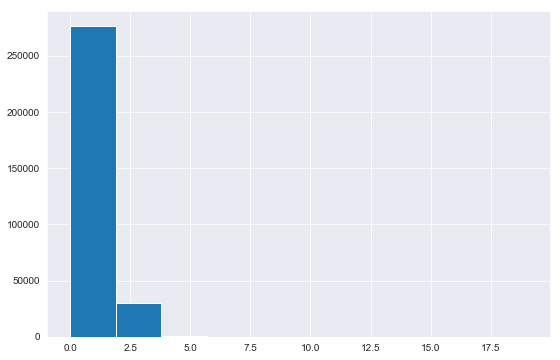

In [63]:
anom_eval(app_train, 'cnt_children', 'application_{train|test}.csv')

In [64]:
for col in cols:
    print(col)
    max_diff_idx = app_train[col].sort_values().diff().nlargest(1).index
    max_diff = app_train.loc[max_diff_idx, col].squeeze()
    denom = int(np.log10(max_diff))
    
    if denom < 2:
        # if we are only in the 10s palce leave it
        cutoff = max_diff
    else:
        # if we are greater than the 10s place round down
        cutoff = int(max_diff/(10**denom))*(10**denom)
    
    anoms_train = app_train.loc[app_train[col]>=cutoff, col]
    anoms_test = app_test.loc[app_test[col]>=cutoff,col]
    # fill with vals from train set
    rest = app_train.loc[~app_train.index.isin(anoms_train.index), col]
    
    # replace outliers with median from non-outlying training data
    app_train.loc[anoms_train.index, col] = rest.median()
    app_test.loc[anoms_test.index, col] = rest.median()
    
    # create identifier for anomalies
    app_train[col+'_anom'] = 0
    app_test[col+'_anom'] = 0
    app_train.loc[anoms_train.index, col+'_anom'] = 1
    app_test.loc[anoms_test.index, col+'_anom'] = 1
    
    # add to indicator columns
    indicator_cols.append(col+'_anom')
    

cnt_children
days_employed
amt_income_total
cnt_fam_members
obs_30_cnt_social_circle
def_30_cnt_social_circle
obs_60_cnt_social_circle
def_60_cnt_social_circle
amt_req_credit_bureau_qrt


#### Fill NAs

In [44]:
from sklearn.preprocessing import Imputer

In [45]:
def pct_null(df):
    null_counts = df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False).to_frame()
    if null_counts.empty:
        return None
    null_counts['pct_null'] = null_counts/df.shape[0]
    null_counts.columns = ['n_null', 'pct_null']
    return null_counts


In [67]:
# good that no null primary keys
app_train[pk].isnull().sum(), app_test[pk].isnull().sum()

(sk_id_curr    0
 dtype: int64, sk_id_curr    0
 dtype: int64)

For columns where less than 20% is null, i'm filling with the most-frequent value

For columns where most is null i'm filling with "missing" and this will get encoded as it's own category.

__NOTE__ A _better_ strategy would be to compute how much the target distributions differ for rows where the column is null and if it is distinctly different then label as "missing" so that it is predictive. Otherwise fill with most-frequent

_OBJECT COLS_

Train

In [68]:
obj_nulls = pct_null(app_train[obj_cols])
fill_most_frequent = obj_nulls[obj_nulls.pct_null < 0.2].index.tolist()
fill_missing = obj_nulls.index.drop(fill_most_frequent)

In [69]:
modes = app_train[fill_most_frequent].mode().T.to_dict()[0]
app_train.fillna(modes, inplace=True)
app_train.fillna(dict.fromkeys(fill_missing,'MISSING'), inplace=True)

Test

In [70]:
obj_nulls = pct_null(app_test[obj_cols])
fill_most_frequent = obj_nulls[obj_nulls.pct_null < 0.2].index.tolist()
fill_missing = obj_nulls.index.drop(fill_most_frequent)

In [71]:
# Note i'm filling with most-frequents from train data even for test missings
modes = app_train[fill_most_frequent].mode().T.to_dict()[0]
app_test.fillna(modes, inplace=True)

In [72]:
app_test.fillna(dict.fromkeys(fill_missing,'MISSING'), inplace=True)

NUMERIC COLS

In [73]:
# for numeric cols, just fill w median
medians = app_train[numeric_cols].median().squeeze()
app_train.fillna(medians, inplace=True)
app_test.fillna(medians, inplace=True)

#### Convert Categorical Variables To Numeric

Label Encode binary categoricals and OHE other categoricals with multiple values

In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [75]:
# first make sure no columns have only 1 value
app_train.columns[app_train.nunique() < 2]

Index([], dtype='object')

In [76]:
binary_cols = app_train[obj_cols].nunique()[app_train[obj_cols].nunique() ==2].index.tolist()
binary_cols

['name_contract_type', 'flag_own_car', 'flag_own_realty']

In [77]:
lcoder = LabelEncoder()
for col in binary_cols:
    print(col)
    # Check to make sure it's binary accross both test and train
    if not set(app_train[col].unique()) == set(app_test[col].unique()):
        print(f'{col} is not Binary!')
        print('Values in train:', set(app_train[col].unique()))
        print('Values in test:', set(app_train[col].unique()))
        continue
    app_train[col] = lcoder.fit_transform(app_train[col])
    app_test[col] = lcoder.transform(app_test[col])
    # don't forget to add it to indicator cols
    indicator_cols.append(col)
    obj_cols.remove(col)

name_contract_type
flag_own_car
flag_own_realty


In [78]:
# One hot encode
non_binary_cats = [col for col in obj_cols if col not in binary_cols]
non_binary_cats

['code_gender',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'weekday_appr_process_start',
 'organization_type',
 'fondkapremont_mode',
 'housetype_mode',
 'wallsmaterial_mode',
 'emergencystate_mode']

In [79]:
for col in non_binary_cats:
    print(col)
    ohe_train = pd.get_dummies(app_train[col]) # drop_first?
    ohe_train.columns = col + '_' + ohe_train.columns
    
    ohe_test = pd.get_dummies(app_test[col]) # they might not align if I drop_first...
    ohe_test.columns = col + '_' + ohe_test.columns
    ohe_test = ohe_test.align(ohe_train, 'left', 1)[0].fillna(0)
    
    # now drop first
    ohe_train.drop(ohe_train.columns[0], axis=1, inplace=True)
    ohe_test.drop(ohe_train.columns[0], axis=1, inplace=True) # should be the same first column, but just incase
    
    app_train = pd.concat([app_train, ohe_train], axis=1)
    app_test = pd.concat([app_test, ohe_test], axis=1)
    print(app_train.shape, app_test.shape)
    del app_train[col]
    del app_test[col]
    obj_cols.remove(col)
    indicator_cols.extend(ohe_train.columns)

code_gender
(307511, 133) (48744, 131)
name_type_suite
(307511, 138) (48744, 136)
name_income_type
(307511, 144) (48744, 141)
name_education_type
(307511, 147) (48744, 144)
name_family_status
(307511, 151) (48744, 147)
name_housing_type
(307511, 155) (48744, 151)
occupation_type
(307511, 172) (48744, 168)
weekday_appr_process_start
(307511, 177) (48744, 173)
organization_type
(307511, 233) (48744, 229)
fondkapremont_mode
(307511, 236) (48744, 232)
housetype_mode
(307511, 238) (48744, 234)
wallsmaterial_mode
(307511, 244) (48744, 240)
emergencystate_mode
(307511, 245) (48744, 241)


In [80]:
app_train.dtypes.value_counts()

uint8      126
float64     67
int64       50
object       1
dtype: int64

In [81]:
app_train.to_csv('clean_data/app_train.csv',index=False)
app_test.to_csv('clean_data/app_test.csv',index=False)

In [86]:
app_train = pd.read_csv('clean_data/app_train.csv', dtype={'sk_id_curr':str, 'sk_id_bureau':str, "sk_id_prev":str})
app_test = pd.read_csv('clean_data/app_test.csv', dtype={'sk_id_curr':str, 'sk_id_bureau':str, "sk_id_prev":str})

### Write Down what you just did

Ordered Columns By Type:

    - Primary Key and Target
    - Object
    - Int + Float = Numeric
    - Indicators (parsed from int cols)
    
Evaluated Numeric Anomalies:

    - Looked far large gaps in the ordered values of each column
    - Evaluated manually, replaced anoms with col medians 
    - Created indicator cols for anom rows
    
Fill NAs:

    - Object Cols filled with either most frequent value or with "MISSING" which will be turned into an indicator
    - Numeric imputed with median
    
Encode Obj Cols:

    - Binary columns turned into 0s/1s
    - Multi-val columns OHE

## Same Thing With Bureau

In [83]:
bureau.dtypes.value_counts()

float64    8
object     5
int64      4
dtype: int64

#### Column Types

In [84]:
bureau.columns = clean_columns(bureau)
pks = ['sk_id_curr', 'sk_id_bureau']

obj_cols = bureau.dtypes[bureau.dtypes == 'object'].index.tolist()
obj_cols = [col for col in obj_cols if col not in pks]
int_cols = bureau.dtypes[bureau.dtypes == 'int64'].index.tolist()
float_cols = bureau.dtypes[bureau.dtypes == 'float64'].index.tolist()
numeric_cols = int_cols + float_cols
indicator_cols = bureau[numeric_cols].columns[bureau[numeric_cols].apply(lambda s: s.nunique())==2].tolist()

ordered_cols = sorted(pks) + sorted(obj_cols) + sorted(int_cols) + sorted(float_cols) + sorted(indicator_cols)
print(bureau.shape, len(ordered_cols))
bureau = bureau[ordered_cols]

(1716428, 17) 17


#### Anomalies

Check for negative numbers

In [85]:
neg_cols = bureau[numeric_cols].columns[bureau[numeric_cols].apply(lambda ser: (ser < 0).any())].tolist()
for col in neg_cols:
    print(col)
    bureau.loc[bureau[col]<0, col] *= -1

days_credit
days_credit_update
days_credit_enddate
days_enddate_fact
amt_credit_sum_debt
amt_credit_sum_limit


In [86]:
gaps = bureau[numeric_cols].apply(lambda s: s.sort_values().diff().max()/s.std())
gaps[gaps>2]

cnt_credit_prolong         10.392428
days_credit_update         54.018977
days_credit_enddate         2.269330
days_enddate_fact          54.594426
amt_credit_max_overdue    377.914034
amt_credit_sum            196.467013
amt_credit_sum_debt       145.546632
amt_credit_sum_limit       19.724401
amt_credit_sum_overdue    217.902873
amt_annuity                95.282754
dtype: float64

In [87]:
cols = [
    'days_credit_update',
    'days_credit_enddate',
    'days_enddate_fact',
    'amt_credit_max_overdue',
    'amt_annuity',
    
    'amt_credit_sum',
    'amt_credit_sum_debt',
    'amt_credit_sum_limit',
    'amt_credit_sum_overdue',
    
]

bureau.csv
amt_credit_sum_overdue
Current amount overdue on Credit Bureau credit

Max Diffs
1689290    3681063.0
188140     2387232.0
1430899    1617403.5
Name: amt_credit_sum_overdue, dtype: float64

Largest Vals
940407     3756681.0
1689290    3681063.0
188140     2387232.0
271894     1851210.0
1430899    1617403.5
Name: amt_credit_sum_overdue, dtype: float64

Smallest Vals
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: amt_credit_sum_overdue, dtype: float64


(1689290    3681063.0
 188140     2387232.0
 1430899    1617403.5
 Name: amt_credit_sum_overdue, dtype: float64, 940407     3756681.0
 1689290    3681063.0
 188140     2387232.0
 271894     1851210.0
 1430899    1617403.5
 Name: amt_credit_sum_overdue, dtype: float64)

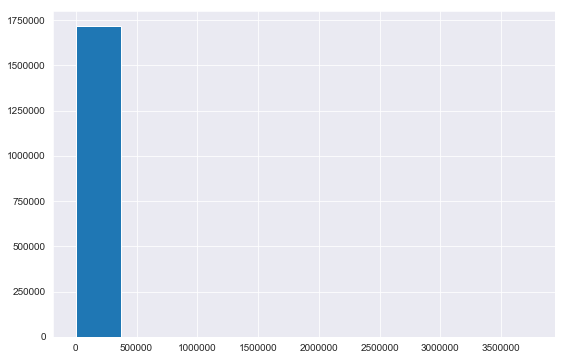

In [88]:
anom_eval(bureau, 'amt_credit_sum_overdue', 'bureau.csv')

In [89]:
for col in cols:
    print(col)
    max_diff_idx = bureau[col].sort_values().diff().nlargest(1).index
    max_diff = bureau.loc[max_diff_idx, col].squeeze()
    denom = int(np.log10(max_diff))
    
    if denom < 2:
        # if we are only in the 10s palce leave it
        cutoff = max_diff
    else:
        # if we are greater than the 10s place round down
        cutoff = int(max_diff/(10**denom))*(10**denom)
    
    anoms = bureau.loc[bureau[col]>=cutoff, col]
    rest = bureau.loc[~bureau.index.isin(anoms_train.index), col]
    
    # replace outliers with median from non-outlying training data
    bureau.loc[anoms_train.index, col] = rest.median()
   
    
    # create identifier for anomalies
    bureau[col+'_anom'] = 0
    bureau.loc[anoms_train.index, col+'_anom'] = 1

    
    # add to indicator columns
    indicator_cols.append(col+'_anom')
    

days_credit_update
days_credit_enddate
days_enddate_fact
amt_credit_max_overdue
amt_annuity
amt_credit_sum
amt_credit_sum_debt
amt_credit_sum_limit
amt_credit_sum_overdue


#### FILL NA

In [90]:
# No missing obj cols
obj_nulls = pct_null(bureau[obj_cols])
obj_nulls

In [91]:
# numeric nulls fill w median
medians = bureau[numeric_cols].median().squeeze()
bureau.fillna(medians, inplace=True)

#### Encoding Cat Vars

In [92]:
bureau.columns[bureau.nunique() < 2]

Index([], dtype='object')

Something is off with these

In [94]:
binary_cols = bureau[obj_cols].nunique()[bureau[obj_cols].nunique() ==2].index.tolist()
binary_cols

[]

In [95]:
# One hot encode
non_binary_cats = [col for col in obj_cols if col not in binary_cols]
non_binary_cats

['credit_active', 'credit_currency', 'credit_type']

In [96]:
for col in non_binary_cats:
    print(col)
    ohe = pd.get_dummies(bureau[col]) # drop_first?
    ohe.columns = col + '_' + ohe.columns
    
    # now drop first
    ohe.drop(ohe.columns[0], axis=1, inplace=True)

    
    bureau = pd.concat([bureau, ohe], axis=1)
    del bureau[col]
    obj_cols.remove(col)
    indicator_cols.extend(ohe_train.columns)

credit_active
credit_currency
credit_type


In [97]:
bureau.to_csv('clean_data/bureau.csv',index=False)

In [85]:
bureau = pd.read_csv('clean_data/bureau.csv', dtype={'sk_id_curr':str, 'sk_id_bureau':str, "sk_id_prev":str})

#### Merge in Bureau Balances?

In [50]:
app_train.head()

,sk_id_curr,target,flag_own_car,flag_own_realty,name_contract_type,flag_cont_mobile,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_2,flag_document_20,flag_document_21,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_email,flag_emp_phone,flag_mobil,flag_phone,flag_work_phone,live_city_not_work_city,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,reg_region_not_live_region,reg_region_not_work_region,cnt_children,days_birth,days_employed,days_id_publish,hour_appr_process_start,region_rating_client,region_rating_client_w_city,amt_annuity,amt_credit,amt_goods_price,amt_income_total,amt_req_credit_bureau_day,amt_req_credit_bureau_hour,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_week,amt_req_credit_bureau_year,apartments_avg,apartments_medi,apartments_mode,basementarea_avg,basementarea_medi,basementarea_mode,cnt_fam_members,commonarea_avg,commonarea_medi,commonarea_mode,days_last_phone_change,days_registration,def_30_cnt_social_circle,def_60_cnt_social_circle,elevators_avg,elevators_medi,elevators_mode,entrances_avg,entrances_medi,entrances_mode,ext_source_1,...,weekday_appr_process_start_TUESDAY,weekday_appr_process_start_WEDNESDAY,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organization_type_Services,organization_type_Telecom,organization_type_Trade: type 1,organization_type_Trade: type 2,organization_type_Trade: type 3,organization_type_Trade: type 4,organization_type_Trade: type 5,organization_type_Trade: type 6,organization_type_Trade: type 7,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,organization_type_XNA,fondkapremont_mode_not specified,fondkapremont_mode_org spec account,fondkapremont_mode_reg oper account,fondkapremont_mode_reg oper spec account,housetype_mode_block of flats,housetype_mode_specific housing,housetype_mode_terraced house,wallsmaterial_mode_MISSING,wallsmaterial_mode_Mixed,wallsmaterial_mode_Monolithic,wallsmaterial_mode_Others,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",wallsmaterial_mode_Wooden,emergencystate_mode_No,emergencystate_mode_Yes
0,100002,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.0,9461,637.0,2120,10,2,2,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,1.0,0.0143,0.0144,0.0144,1134.0,3648.0,2.0,2.0,0.00,0.00,0.0000,0.0690,0.0690,0.0690,0.083037,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [51]:
bureau.head()

,sk_id_bureau,sk_id_curr,cnt_credit_prolong,credit_day_overdue,days_credit,days_credit_update,amt_annuity,amt_credit_max_overdue,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_enddate,days_enddate_fact,days_credit_update_anom,days_credit_enddate_anom,days_enddate_fact_anom,amt_credit_max_overdue_anom,amt_annuity_anom,amt_credit_sum_anom,amt_credit_sum_debt_anom,amt_credit_sum_limit_anom,amt_credit_sum_overdue_anom,credit_active_Bad debt,credit_active_Closed,credit_active_Sold,credit_currency_currency 2,credit_currency_currency 3,credit_currency_currency 4,credit_type_Car loan,credit_type_Cash loan (non-earmarked),credit_type_Consumer credit,credit_type_Credit card,credit_type_Interbank credit,credit_type_Loan for business development,credit_type_Loan for purchase of shares (margin lending),credit_type_Loan for the purchase of equipment,credit_type_Loan for working capital replenishment,credit_type_Microloan,credit_type_Mobile operator loan,credit_type_Mortgage,credit_type_Real estate loan,credit_type_Unknown type of loan
0,5714462,215354,0,0,497,131.0,0.0,0.0,91323.0,0.0,0.0,0.0,153.0,153.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5714463,215354,0,0,208,20.0,0.0,0.0,225000.0,171342.0,0.0,0.0,1075.0,897.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,5714464,215354,0,0,203,16.0,0.0,0.0,464323.5,0.0,0.0,0.0,528.0,897.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,5714465,215354,0,0,203,16.0,0.0,0.0,90000.0,0.0,0.0,0.0,862.0,897.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5714466,215354,0,0,629,21.0,0.0,77674.5,2700000.0,0.0,0.0,0.0,1197.0,897.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


We are going to have to merge aggregates of sk_id_curr from bureau onto app_train/test. Rather than just totaling/averaging. Lets try and pivot by time so we have windows of time before present (eg balances within prev year, balances within prev 5 years, 10 yr etc.

This creates more columns but hopefully adds more useful information.

Quick Cleaning

In [101]:
bureau_balances.columns = clean_columns(bureau_balances)

In [55]:
col_descrip('bureau_balance.csv', 'months_balance')

bureau_balance.csv
months_balance


'Month of balance relative to application date (-1 means the freshest balance date)'

In [63]:
bureau_balances['months_balance'] = bureau_balances.months_balance * -1

In [65]:
# bin balances into ['lt_1yr', '1-5yr', '5-10yr', 'gt10yr']
bureau_balances['balance_date_bin'] = pd.cut(bureau_balances.months_balance, [0,12,60,120,np.inf], labels=['lt1yr', 'yr1_5', 'yr5_10', 'gt10yr'], right=False)

In [68]:
# drop the original months_balance col
bureau_balances.drop('months_balance', axis=1, inplace=True)

In [66]:
col_descrip('bureau_balance.csv', 'status')

bureau_balance.csv
status


'Status of Credit Bureau loan during the month (active, closed, DPD0-30,\x85 [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,\x85 5 means DPD 120+ or sold or written off ] )'

One hot encode Status

In [80]:
status_dummies = pd.get_dummies(bureau_balances.status).drop('X',axis=1)
status_dummies.columns = 'balance_status_'+status_dummies.columns

bureau_balances.drop('status', axis=1, inplace=True)
bureau_balances = pd.concat([bureau_balances, status_dummies], axis=1)

Merge with Bureau

In [81]:
bureau.shape, bureau_balances.shape

((1716428, 43), (27299925, 9))

In [87]:
bureau_mrgd = bureau_balances.merge(bureau, 'left', ['sk_id_bureau'])
bureau_mrgd.shape

(27299925, 51)

In [ ]:
bureau_mrgd.to_csv()

In [89]:
bureau_mrgd.isnull().sum()

KeyboardInterrupt: 

#### Aggregate and merge with App_train/test

In [ ]:
bureau_mrgd

#### Correlations (& Collinearity)